In [1]:
# مدل برای پیش بینی قیمت خانه با استفاده از پایتون 

In [2]:
#numpy: یک کتابخانه پایتون است که برای کار با آرایه ها استفاده می شود
#pandas: یک کتابخانه پایتون برای تجزیه و تحلیل داده ها است
#matplotlib: یک کتابخانه جامع برای ایجاد تجسم های ثابت، متحرک و تعاملی در پایتون است
#seaborn:  این یک رابط سطح بالا برای ترسیم گرافیک های آماری جذاب و آموزنده فراهم می کند
#mpl_toolkits:  کلیفورد یک بسته پایتون برای رسم چند بردار جبر هندسی، از بسته کلیفورد، با استفاده از matplotlib.
#%matplotlib inline:با این بک اند، خروجی دستورات رسم به صورت درون خطی مانند نوت بوک  Jupyter، مستقیماً زیر سلول کدی که آن را تولید کرده، نمایش داده می شود

In [3]:
import numpy as np    # pip install numpy
import pandas as pd   # pip install pandas
import matplotlib.pyplot as plt  # pip install matplotlib
import seaborn as sne   # pip install seaborn
import mpl_toolkits
%matplotlib inline

In [4]:
# #ابتدا مجموعه داده های خود را وارد می کنم و سپس سر داده ها را می بینم تا بدونم داده ها چگونه به نظر می رسند

In [6]:
data = pd.read_csv("kc_house_data.csv")

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
#از عملکرد توصیفی بالا چه چیزی می توانیم استنباط کنیم؟
# مجموعه داده خانه ای دارد که در آن خانه 33 اتاق خواب دارد، به نظر می رسد خانه ای بزرگ است و در حین پیشرفت، دانستن بیشتر در مورد آن جالب است.
#حداکثر فوت مربع 13450 است که حداقل آن 290 است. می توان دید که داده ها توزیع شده اند.


#اکنون، میخوام مقداری تجسم را ببینیم

In [10]:
#همانطور که از تجسم می بینیم خانه های 3 خوابه بیشتر فروخته می شوند و پس از آن 4 خوابه.
# برای سازنده ای که این داده ها را دارد، می تواند یک ساختمان جدید با تعداد 3 و 4 اتاق خواب بیشتر بسازد تا خریداران بیشتری را جذب کند.
#بنابراین اکنون می دانیم که اتاق های 3 و 4 خوابه پرفروش ترین هستند. اما در کدام منطقه؟

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

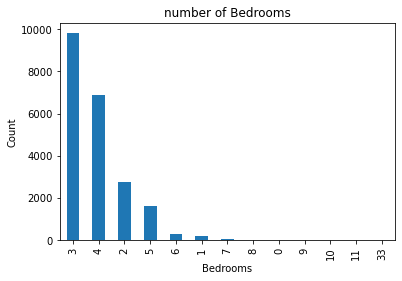

In [11]:
data['bedrooms'].value_counts().plot(kind = 'bar')
plt.title('number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sne.despine

In [12]:
#تجسم موقعیت خانه ها بر اساس طول و عرض جغرافیایی.
#بنابراین با توجه به مجموعه داده، طول و عرض جغرافیایی در مجموعه داده برای هر خانه داریم

F:\anaconda\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

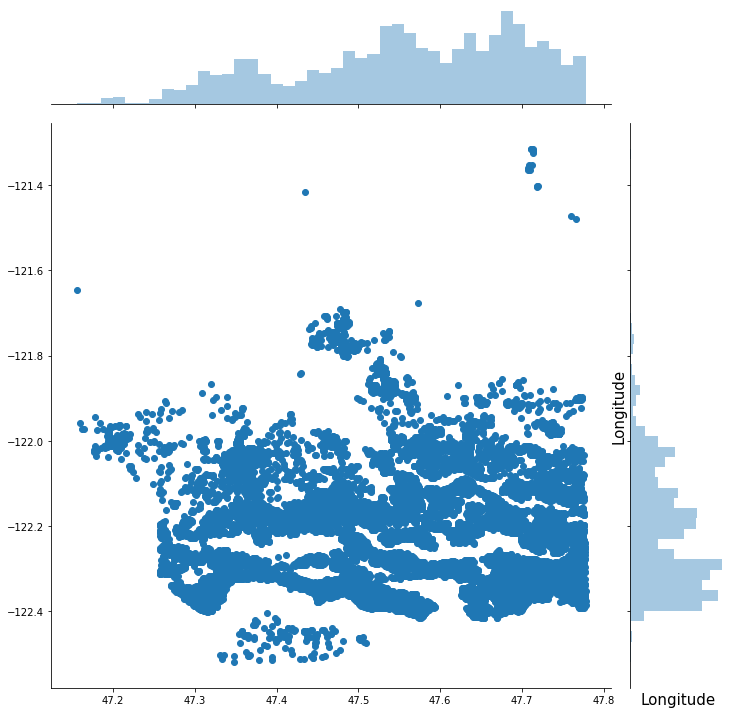

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [13]:
#ویژگی figsize به ما اجازه می دهد که عرض و ارتفاع یک شکل را بر حسب واحد اینچ مشخص کنیم
plt.figure(figsize=(10,10))
#رسم دو متغیر با نمودارهای دو متغیره و تک متغیره.
sne.jointplot(x = data.lat.values, y = data.long.values, size=10)
#این تابع برچسب را برای محور y نمودار تنظیم می کند.
plt.ylabel('Longitude', fontsize=15)
#این تابع برچسب را برای محور x نمودار تنظیم می کند.
plt.xlabel('Longitude', fontsize=15)
#بدون plt.show()، شکل نشان داده نمی شود.
plt.show()
#()despine تابعی است که به طور پیش فرض اسپین ها را از سمت راست و بالای نمودار حذف می کند.
sne.despine

In [14]:
#ما از seaborn استفاده می کنیم و تجسم زیبای او را دریافت می کنیم. تابع Joinplot به ما کمک می کند تا غلظت داده ها و محل قرارگیری داده ها را ببینیم و می تواند واقعا مفید باشد.
#برای عرض جغرافیایی بین -47.7 و -48.8 خانه های زیادی وجود دارد، که به این معنی است که شاید یک مکان ایده آل باشد
#اما وقتی در مورد طول جغرافیایی صحبت می کنیم، می بینیم که غلظت بین 122.2- تا 122.4- زیاد است. این بدان معناست که بیشتر خریدها برای این مکان خاص بوده است.

In [15]:
#چه عواملی بر قیمت خانه تاثیر می گذارد؟
#ما مکان های رایج را دیدیم و اکنون چند فاکتور مشترک را می بینیم که بر قیمت خانه تأثیر می گذارد

In [16]:
# آیا قیمت تحت تأثیر منطقه زندگی خانه قرار می گیرد یا خیر؟

Text(0.5, 1.0, 'Prie VS Square Feet')

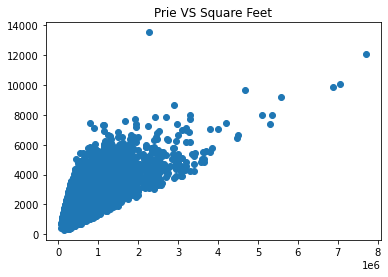

In [17]:
plt.scatter(data.price,data.sqft_living)
plt.title('Prie VS Square Feet')

Text(0.5, 1.0, 'Prie VS Location of the area')

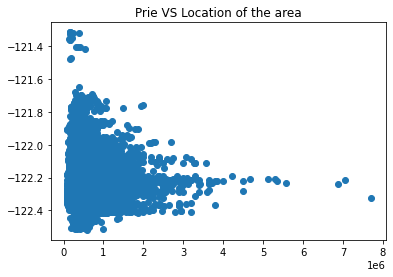

In [18]:
plt.scatter(data.price,data.long)
plt.title('Prie VS Location of the area')

In [19]:
#نموداری که در بالا استفاده کردم نمودار پراکندگی نامیده می شود
# نمودار پراکندگی به ما کمک می کند تا ببینیم نقاط داده ما چگونه پراکنده هستند و معمولاً برای دو متغیر استفاده می شود
#از شکل اول می بینیم که بیشتر منطقه زندگی، قیمت بیشتر است،
# به لطف نمودار پراکندگی، ما همچنین می توانیم برخی از بی نظمی ها را مشاهده کنیم که خانه با بالاترین فوت مربع به قیمت بسیار کمتر فروخته شده است، شاید عامل دیگری وجود داشته باشد یا احتمالاً داده ها اشتباه است
#شکل دوم موقعیت خانه ها را از نظر طول جغرافیایی به ما می گوید و مشاهده کاملاً جالبی را به ما می دهد که 2/122- تا 4/122- خانه ها را با مبلغ بسیار بالاتری به فروش می رساند.

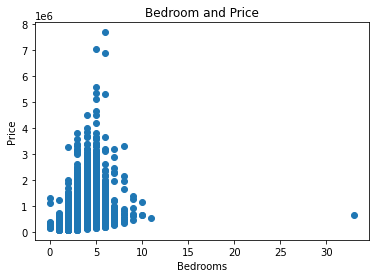

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [20]:
plt.scatter(data.bedrooms, data.price)
plt.title("Bedroom and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sne.despine

In [21]:
#ما می توانیم عوامل بیشتری را در قیمت مشاهده کنیم

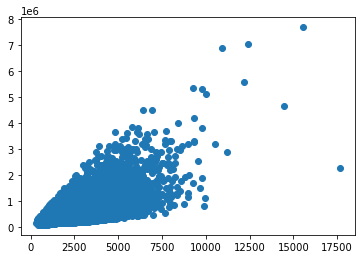

In [22]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

Text(0.5, 1.0, 'Waterfront VS Price')

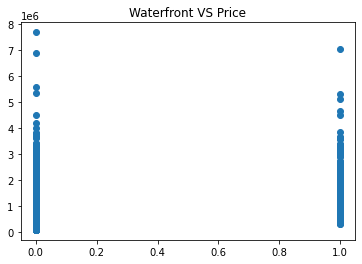

In [23]:
plt.scatter(data.waterfront, data.price)
plt.title("Waterfront VS Price")

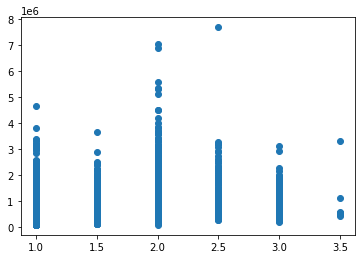

In [24]:
plt.scatter(data.floors, data.price)

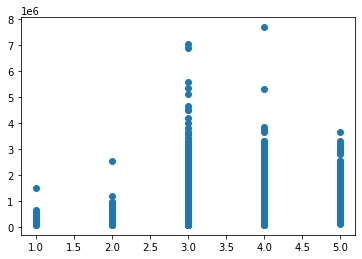

In [25]:
plt.scatter(data.condition, data.price)

Text(0.5, 1.0, 'which is the pricey location by zipcode?')

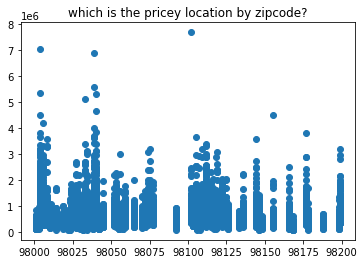

In [26]:
plt.scatter(data.zipcode, data.price)
plt.title("which is the pricey location by zipcode?")

In [27]:
#همانطور که از تمام نمایش های بالا می بینیم که عوامل زیادی بر قیمت خانه تأثیر می گذارد، مانند متر مربع که قیمت خانه را افزایش می دهد و حتی موقعیت مکانی بر قیمت خانه تأثیر می گذارد.
#و مدلی بسازیم که قیمت خانه را بر اساس سایر عوامل مانند فوت مربع، جلو آب و غیره پیش بینی کند.

In [28]:
#رگرسیون خطی :-
#به عبارت ساده، مدلی در آمار که به ما کمک می کند آینده را بر اساس روابط گذشته متغیرها پیش بینی کنیم. بنابراین وقتی می بینید نمودار پراکندگی شما دارای نقاط داده به صورت خطی است، می دانید که رگرسیون می تواند به شما کمک کند!

In [29]:
#رگرسیون بر روی معادله خط کار می کند، y=mx+c، خط روند از طریق نقاط داده تنظیم می شود تا نتیجه را پیش بینی کند.

In [30]:
#متغیری که ما پیش بینی می کنیم متغیر معیار نامیده می شود و به آن Y گفته می شود. متغیری که پیش بینی های خود را بر اساس آن انجام می دهیم، متغیر پیش بینی کننده نامیده می شود و به آن X می گویند. زمانی که تنها یک متغیر پیش بینی کننده وجود داشته باشد، روش پیش بینی نامیده می شود. رگرسیون ساده و در صورت وجود متغیر پیش بینی کننده چندگانه، رگرسیون چندگانه.

In [31]:
from sklearn.linear_model import LinearRegression  # pip install scikit-learn

In [32]:
reg = LinearRegression()

In [33]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'], axis = 1)


In [34]:
from sklearn.model_selection import train_test_split  #pip install scikit-learn

In [35]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size = 0.10, random_state = 2)

In [36]:
reg.fit(x_train, y_train)

LinearRegression()

In [37]:
reg.score(x_test, y_test)

0.7320342760357544

In [38]:
# من چیکار کردم؟


#1
#ما دیتا های خود را وارد کردیم، برای رگرسیون خطی از اسکی لرن(ساخته شده در کتابخانه پایتون) استفاده می کنم و رگرسیون خطی را از آن وارد می کنم.
#2
#سپس رگرسیون خطی را به یک متغیر reg مقداردهی اولیه می کنیم.
#3
#اکنون می‌دانیم که قیمت‌ها باید پیش‌بینی شوند، بنابراین برچسب‌ها (خروجی) را به عنوان ستون‌های قیمت تنظیم می‌کنیم و همچنین دیتا ها را به 1 و 0 تبدیل می‌کنیم تا روی داده‌های ما تأثیر زیادی نداشته باشد. ما از 0 برای خانه هایی استفاده می کنیم که نوساز هستند و بعد از سال 2014 ساخته شده اند.
#4
#ما دوباره وابستگی دیگری وارد می کنیم تا داده های خود را به آموزش و آزمایش تقسیم کنیم.
#5
#من داده‌های خود را به‌عنوان 90 درصد و 10 درصد از داده‌ها به عنوان داده‌های آزمایشی خود قرار داده‌ام و با استفاده از حالت random_state، تقسیم داده‌ها را تصادفی کردم.
#6
#بنابراین اکنون، داده‌ها ، داده‌های آزمایشی و برچسب‌هایی برای هر دو داریم که اجازه دهید داده‌های و آزمایش خود را در مدل رگرسیون خطی قرار دهیم.
#7
#پس از تطبیق داده‌های خود با مدل، می‌توانیم امتیاز داده‌های خود را بررسی کنیم، یعنی پیش‌بینی. در این مورد پیش بینی 73٪ است


####دقت مدل کمتر از هدف ما در 85 است.########


#برای ساخت یک مدل پیش بینی، بسیاری از رگرسیون تقویت گرادیان استفاده می کنند، بنابراین تقویت گرادیان چیست؟ این یک تکنیک یادگیری ماشینی برای مشکلات رگرسیون و طبقه بندی است که یک مدل پیش بینی را در قالب مجموعه ای از مدل های پیش بینی ضعیف، معمولاً تصمیم گیری تولید می کند.

#روش تقویت گرادیان را با استفاده از همان روش درک کنیم. بنابراین، بیایید تجزیه و تحلیل کنیم که چرا دانش آموز ما (ماشین) بالای 85٪ نگرفت؟ دلایل زیادی می تواند وجود داشته باشد که چنین دلایلی می تواند وجود داشته باشد:


#1
#دانش آموز ما قبل از امتحان تعداد کمی از موضوعات را فراموش کرده است، به همین ترتیب داده های خوانده شده توسط ماشین ممکن است از بین بروند.
#2
#این می تواند یک یادگیرنده ضعیف باشد که با خواندن یاد نمی گیرد اما نیاز به تجسم دارد. ماشین ما می تواند یک یادگیرنده ضعیف باشد و ممکن است به درخت تصمیم نیاز داشته باشد.
#3
#حتی پس از استفاده از تکنیک های جدیدتر، دانش آموز ما ممکن است برنامه درسی را به خاطر نیاورد، بنابراین به دانش آموز خود زمان می دهیم تا بخواند و بفهمد. به طور مشابه برای ماشین.

#از این رو برای همه این مشکلات یک راه حل وجود دارد، تقویت گرادیان.

#بیایید ببینیم چگونه این کار را انجام می دهیم و سپس می توانیم به عمق برویم و بفهمیم چه اتفاقی می افتد.



In [39]:
from sklearn import ensemble  # pip install sklearn
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
                                        learning_rate = 0.1, loss = 'ls')

In [45]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [47]:
clf.score(x_test, y_test)

0.9210197651001668

In [ ]:
#ما یک متغیر ایجاد می کنیم که در آن رگرسیور تقویت گرادیان خود را تعریف می کنیم و پارامترهایی را برای آن تنظیم می کنیم.

#n_estimator - تعداد مراحل تقویت برای انجام. ما نباید آن را خیلی بالا قرار دهیم که بیش از حد با مدل ما سازگار باشد.

#max_depth - عمق گره درخت.
#Learning_rate - نرخ یادگیری داده ها.
#Loss  - تابع Loss باید بهینه شود. ls به رگرسیون حداقل مربعات اشاره دارد
#minimum sample split: تعداد نمونه هایی که باید برای یادگیری داده ها تقسیم شوند
#سپس داده های آموزشی خود را در مدل تقویت گرادیان قرار می دهیم و صحت را بررسی می کنیم


####ما دقت 92.00٪ را دریافت کردیم که شگفت انگیز است!

